In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('C:\\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw4\wine.txt',header=None)
data.columns=['class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
#data= data.drop('class', 1)
#data= data.drop(columns=[0])
data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
class K_Means:
    def __init__(self, k=3, bound=0.000001, iter=1000):
        self.k = k
        self.bound = bound
        self.iter = iter

    def fit(self,data):

        self.centers = {}

        for i in range(self.k):
            self.centers[i] = data[i]

        for i in range(self.iter):
            self.classes = {}

            for i in range(self.k):
                self.classes[i] = []

            for attributes in data:
                distances = [np.linalg.norm(attributes-self.centers[centroid]) for centroid in self.centers]
                classification = distances.index(min(distances))
                self.classes[classification].append(attributes)

            prev_centers = dict(self.centers)

            for classification in self.classes:
                self.centers[classification] = np.average(self.classes[classification],axis=0)

            optimized = True

            for c in self.centers:
                original_centroid = prev_centers[c]
                current_centroid = self.centers[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.bound:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

In [9]:
colors = ["g","r","y","b"]
X = np.array(data[['Alcohol','Color_intensity']])

In [10]:
clf=K_Means()
clf.fit(X)

15.185140487617984
29.351463023486694
0.025645322840822493
19.227453663020274
4.426556133176694
1.4235020952712014


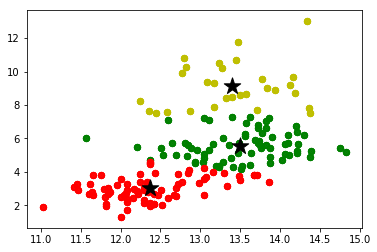

In [11]:
for classification in clf.classes:
    color = colors[classification]
    for attributes in clf.classes[classification]:
        
        for i in range(3):
            plt.scatter(attributes[0], attributes[1],marker='.', color=colors[classification], s=20, linewidths=5)

        
for centroid in clf.centers:
    plt.scatter(clf.centers[centroid][0], clf.centers[centroid][1],
                marker="*", color='black', s=300, linewidths=1)
        
plt.show()

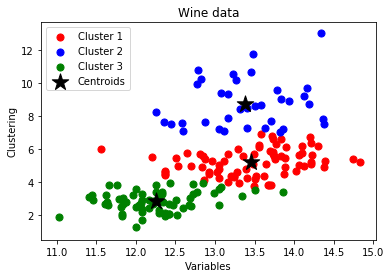

In [12]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = True)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black',marker='*', label = 'Centroids')
plt.title('Wine data')
plt.xlabel('Variables')
plt.ylabel('Clustering')
plt.legend()
plt.show()